# K-Means Clustering Based on Month and Location of Crime

In [1]:
import time
import pandas as pd
import numpy as np
import scipy as sp

import scipy.cluster.vq
import scipy.spatial.distance
import scipy.stats
import sklearn.cluster
from sklearn.cluster import KMeans

import pylab as pl

#Reading The CSV
data=pd.read_csv('crime.csv',engine='python')

data_clus = data[['MONTH','Long','Lat']].dropna()

data_clus = data_clus.loc[(data_clus['Long'] < -70)  &  (data_clus['Lat'] > 30)]

In [2]:
data_clus.describe()

,MONTH,Long,Lat
count,306413.000000,306413.000000,306413.000000
mean,6.674469,-71.082841,42.322292
std,3.258638,0.029744,0.031859
min,1.000000,-71.178674,42.232413
25%,4.000000,-71.097189,42.297555
50%,7.000000,-71.077550,42.325646
75%,9.000000,-71.062563,42.348624
max,12.000000,-70.963676,42.395042


In [3]:
x = data_clus[~np.isnan(data_clus)]

model = KMeans(3)
model.fit(x)
labels = model.predict(x)
centroids = model.cluster_centers_

kmeans = pd.DataFrame(labels)

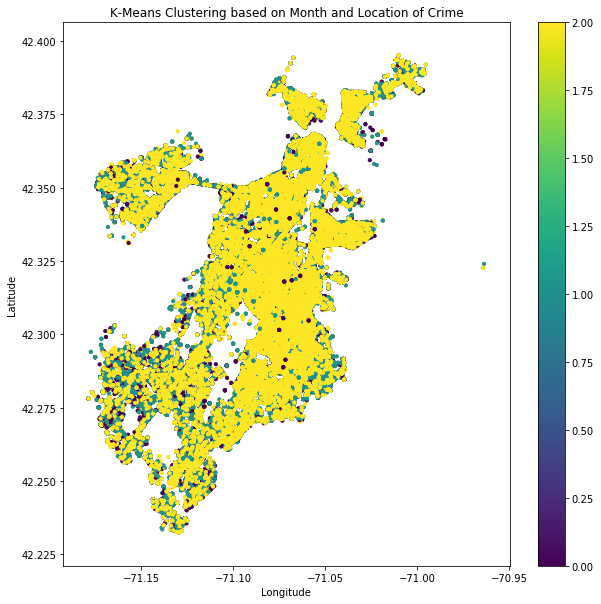

In [4]:
import matplotlib.pyplot as plt
  
sub = plt.figure(figsize = (10,10)).add_subplot(111)
sub.set_title('K-Means Clustering based on Month and Location of Crime')
sub.set_xlabel('Longitude')
sub.set_ylabel('Latitude')
plt.colorbar(sub.scatter(x['Long'],x['Lat'],
                     c=kmeans[0],s=10))

# K-Means Clustering Based on Offense Code and Location of Crime

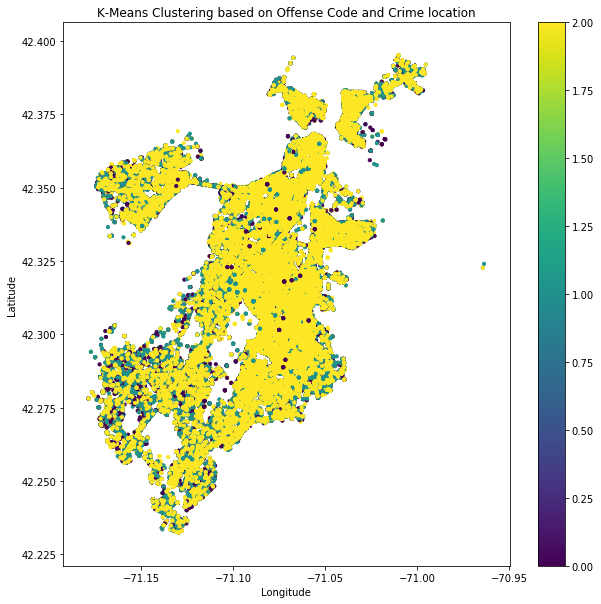

In [5]:
data_clus = data[['OFFENSE_CODE','Long','Lat']].dropna()
data_clus = data_clus.loc[(data_clus['Long'] < -70)  &  (data_clus['Lat'] > 30)]


x = data_clus[~np.isnan(data_clus)]

colors = np.random.rand(len(x))
sub = plt.figure(figsize=(10,10)).add_subplot(111)

sub.set_title('K-Means Clustering based on Offense Code and Crime location')
sub.set_xlabel('Longitude')
sub.set_ylabel('Latitude')

plt.colorbar(sub.scatter(x['Long'], x['Lat'], c=kmeans[0],  s=10))


In [6]:
location = data[['Lat','Long']]

In [7]:
location.isnull().sum()

Lat     20632
Long    20632
dtype: int64

In [8]:
location=location.dropna()

In [9]:
location.isnull().sum()

Lat     0
Long    0
dtype: int64

In [10]:
location = location.loc[(location['Long'] < -70)  &  (location['Lat'] > 30)]

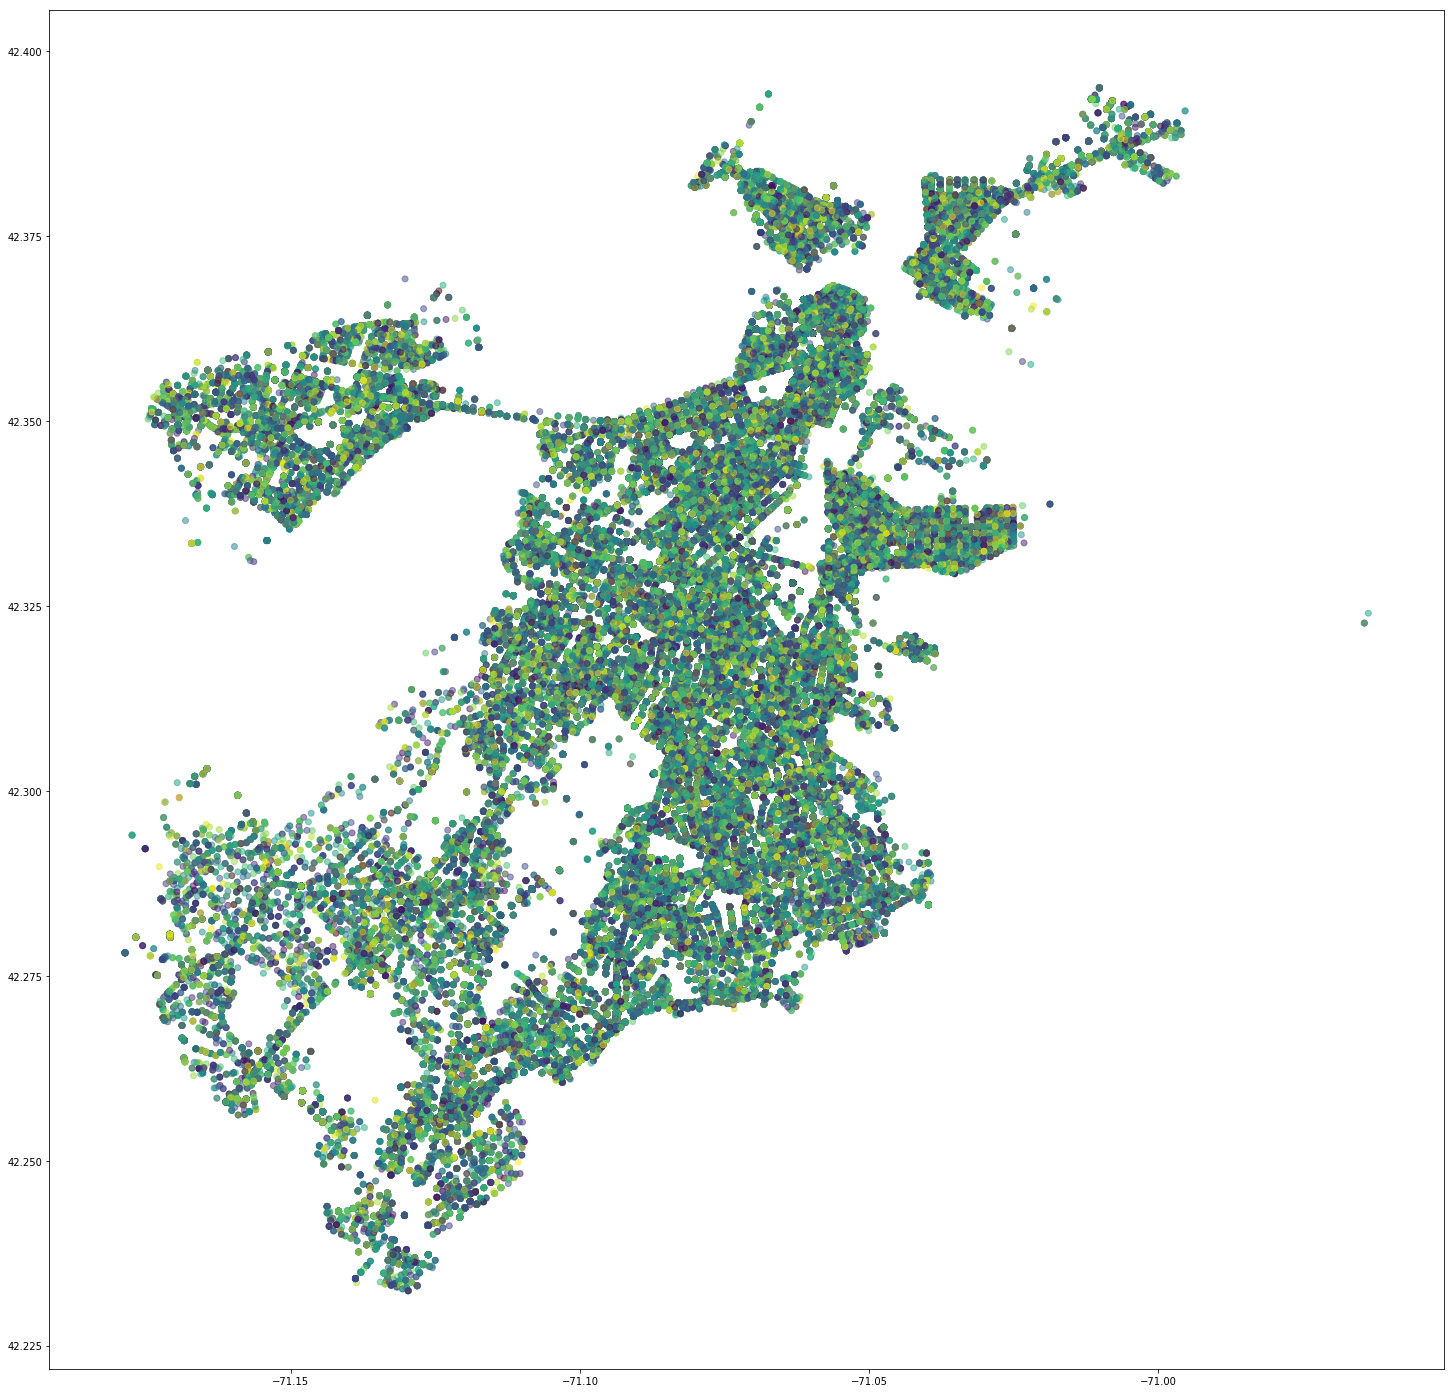

In [11]:
colors = np.random.rand(len(location))

plt.figure(figsize=(25,25))
plt.scatter(location['Long'], location['Lat'] , c=colors, alpha=0.5)
plt.show()

# K-Means Clustering Based on Location 

In [12]:
l = location[~np.isnan(location)]
model = KMeans(10)
model.fit(l)
labels = model.predict(l)
centroids = model.cluster_centers_

kmeans = pd.DataFrame(labels)

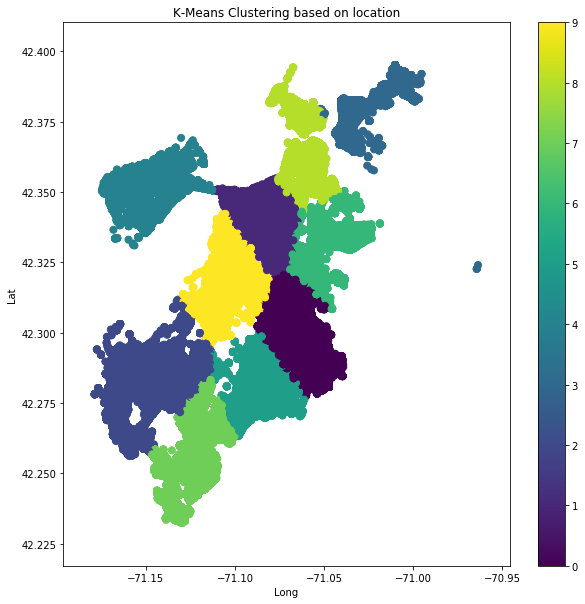

In [13]:
l.insert((l.shape[1]),'kmeans',kmeans)

#Plotting the clusters 
fig = plt.figure(figsize=(10,10))
sub = fig.add_subplot(111)
sub.set_title('K-Means Clustering based on location')
sub.set_xlabel('Long')
sub.set_ylabel('Lat')
plt.colorbar(sub.scatter(l['Long'],l['Lat'],c=kmeans[0],s=50))